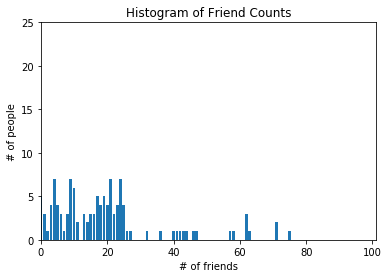

In [53]:
# STATISTICS

# 1) DESCRIBING A SINGLE SET OF DATA 

from matplotlib import pyplot as plt
from collections import Counter
import math
import random


num_friends = []

# simulate most people have fewer friends
for x in range(0, 100):
    num_friends.append(random.randint(0, 25))

# simulate outliers with more friends
for x in range(0, 20):
    num_friends.append(random.randint(26, 75))

friend_counts = Counter(num_friends)

xs = range(101)
ys = [friend_counts[x] for x in xs]

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [54]:
num_points = len(num_friends)

largest_value = max(num_friends)
smallest_value = min(num_friends)

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

In [55]:
# 2) CENTRAL TENDENCIES

def mean(x):
    return sum(x) / len(x)

mean(num_friends)

def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

median(num_friends)

def quantile(x, p):
    """returns the pth-percentile value in x"""
    
    p_index = int(p * len(x))
    return sorted(x)[p_index]

quantile(num_friends, 0.25)

def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]

mode(num_friends)



[4, 9, 21, 24]

In [58]:
# DISPERSION

# Dispersion refers to measures of how spread out the data is.
# Zero - not spread out at all. Large values - very spread out.

def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

# from Linear Algebra chapter
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    return dot(v, v)

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

16.69976894789761

In [1]:
# Correlation

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

# covariance(num_friends, daily_minutes) - if daily_minutes were available

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / std_ev / stdev_y
    else:
        return 0 # if no variation, correlation is zero

# correlation(num_friends, daily_minutes) 